In [4]:
import os
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# TRAIN_PATH = os.path.join(DATA_DIR, 'KDDTrain+.txt')

df = pd.read_csv('labeled_CSV')
df


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [2]:
# df.columns
# df
df['class'].unique()
df['duration']



0         0
1         0
2         0
3         0
4         0
         ..
125968    0
125969    8
125970    0
125971    0
125972    0
Name: duration, Length: 125973, dtype: int64

In [3]:
df['duration']

0         0
1         0
2         0
3         0
4         0
         ..
125968    0
125969    8
125970    0
125971    0
125972    0
Name: duration, Length: 125973, dtype: int64

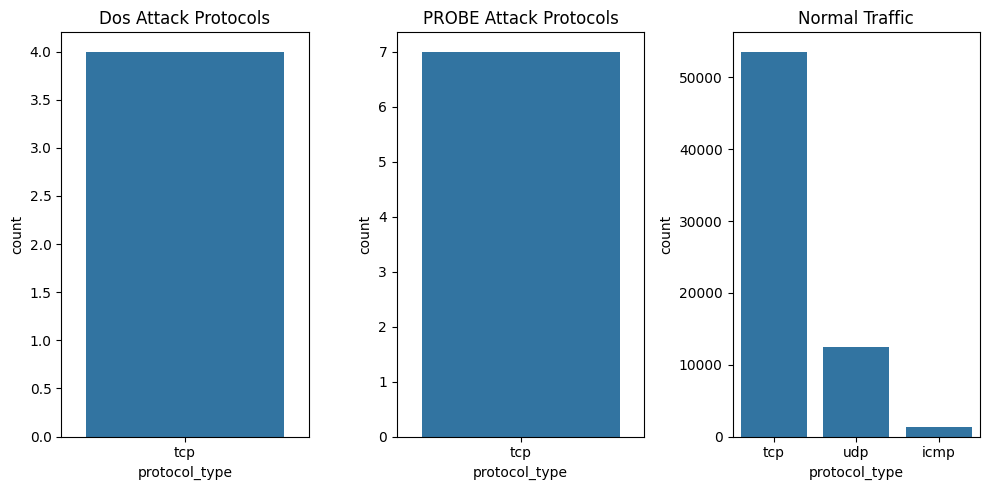

In [4]:
fig, axes = plt.subplots(1,3, figsize=(10,5))
sns.countplot(x='protocol_type', data = df[df['class'] == 'phf'],ax= axes[0])
axes[0].set_title("Dos Attack Protocols")
sns.countplot(x='protocol_type', data = df[df['class'] == 'multihop'],ax= axes[1])
axes[1].set_title("PROBE Attack Protocols")
sns.countplot(x='protocol_type', data = df[df['class'] == 'normal'],ax= axes[2])
axes[2].set_title("Normal Traffic")

plt.tight_layout()
plt.show()




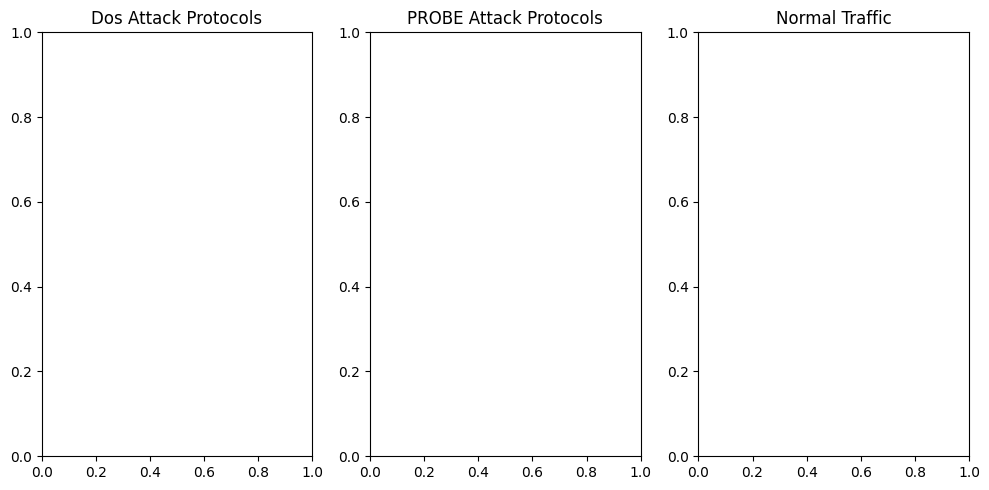

In [5]:
fig, axes = plt.subplots(1,3, figsize=(10,5))
sns.countplot(x='protocol_type', data = df[df['class'] == 'duration'],ax= axes[0])
axes[0].set_title("Dos Attack Protocols")
sns.countplot(x='protocol_type', data = df[df['class'] == 'duration'],ax= axes[1])
axes[1].set_title("PROBE Attack Protocols")
sns.countplot(x='protocol_type', data = df[df['class'] == 'duration'],ax= axes[2])
axes[2].set_title("Normal Traffic")

plt.tight_layout()
plt.show()

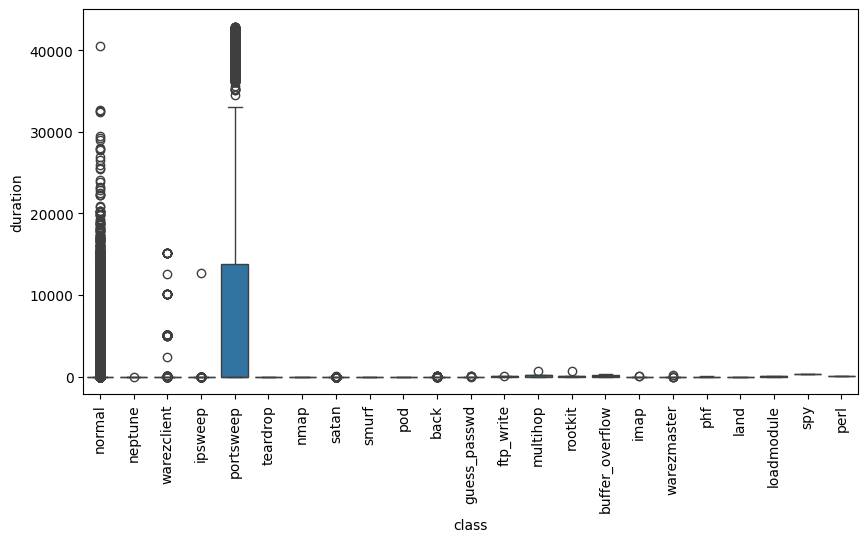

In [6]:
plt.figure(figsize=(10,5))
sns.boxplot(x='class',y='duration',data=df)
plt.xticks(rotation=90)
plt.show()

In [13]:
avg_distribution = df.groupby('class')['duration'].mean().sort_values()
avg_distribution

class
teardrop              0.000000
smurf                 0.000000
land                  0.000000
pod                   0.000000
nmap                  0.000000
neptune               0.000049
satan                 0.127718
back                  0.297071
guess_passwd          2.716981
ipsweep               3.616004
phf                   4.500000
imap                  6.545455
warezmaster          15.050000
ftp_write            32.375000
loadmodule           36.222222
perl                 41.333333
buffer_overflow      91.700000
rootkit             100.800000
normal              168.587396
multihop            184.000000
spy                 318.000000
warezclient         705.092135
portsweep          8246.697032
Name: duration, dtype: float64

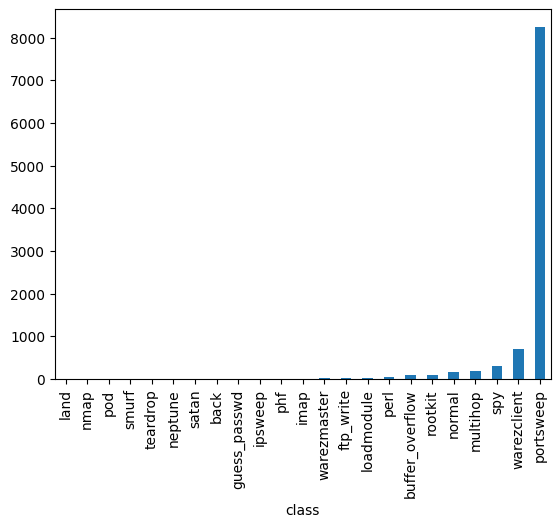

In [7]:
avg_distribution = df.groupby('class')['duration'].mean().sort_values()
avg_distribution

avg_distribution.plot(kind = 'bar')
plt.show()

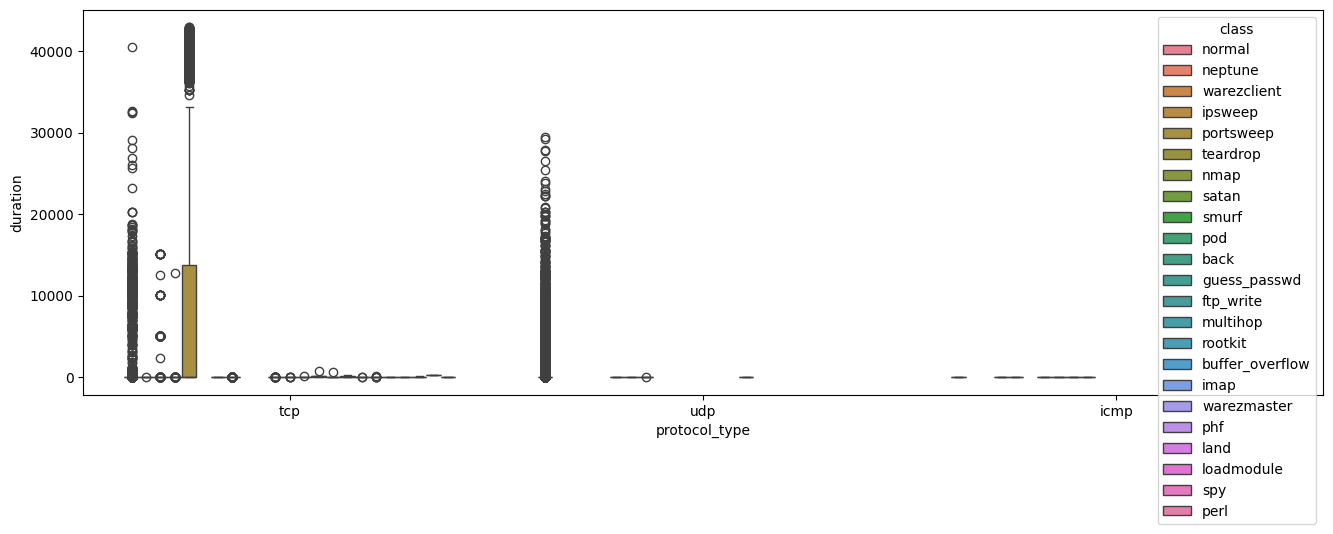

In [8]:
plt.figure(figsize=(16,5))
sns.boxplot(x = 'protocol_type',y='duration',hue='class', data = df)
plt.show()